In [ ]:
# Realize experimentos computacionais comparando dois ou mais algoritmos de agrupa-
# mento. Para isso, utilize conjuntos de dados para problemas de classificação disponı́veis
# em repositórios (UCI, Kaggle, etc.). Apresente a metodologia utilizada nos experimen-
# tos e os resultados obtidos.

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


In [339]:
df_mall = pd.read_csv('dataset/Mall_Customers.csv')

In [340]:
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [341]:
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [342]:
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [343]:
le_mall_gender = preprocessing.LabelEncoder()
le_mall_gender.fit(df_mall["Gender"])
df_mall["Gender"] = le_mall_gender.transform(df_mall["Gender"])

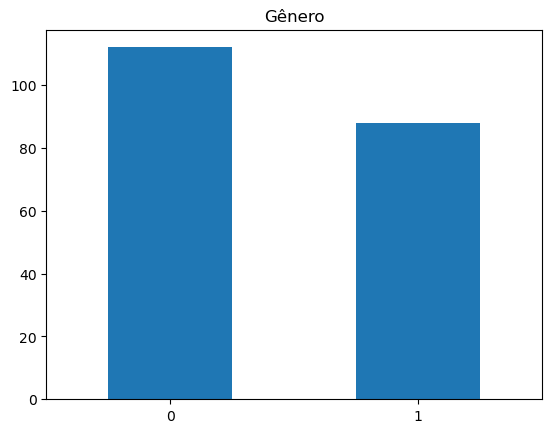

In [480]:
df_mall_backup["Gender"].value_counts().plot.bar(rot = 0)
plt.title("Gênero")
plt.show()

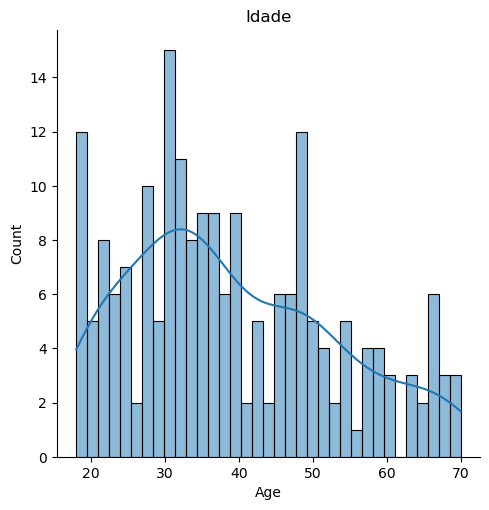

In [345]:
sns.displot(df_mall, x="Age", bins=35, kde=True)
plt.title("Idade")
plt.show()

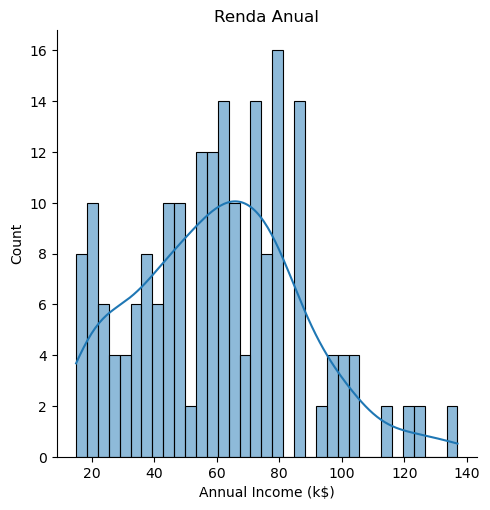

In [346]:
sns.displot(df_mall, x="Annual Income (k$)", bins=35, kde=True)
plt.title("Renda Anual")
plt.show()

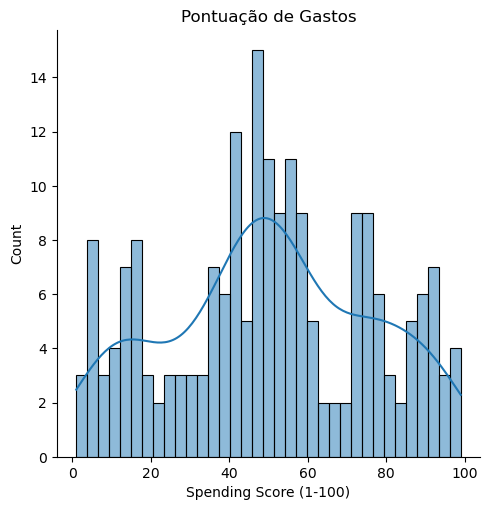

In [347]:
sns.displot(df_mall, x="Spending Score (1-100)", bins=35, kde=True)
plt.title("Pontuação de Gastos")
plt.show()

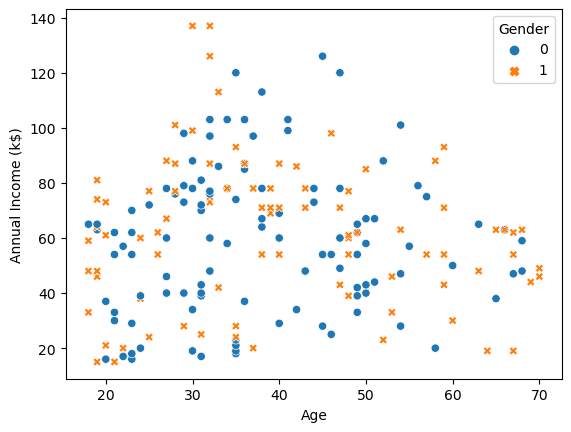

In [348]:
sns.scatterplot(data=df_mall, x='Age', y='Annual Income (k$)', hue='Gender', style='Gender')
plt.show()

In [251]:
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


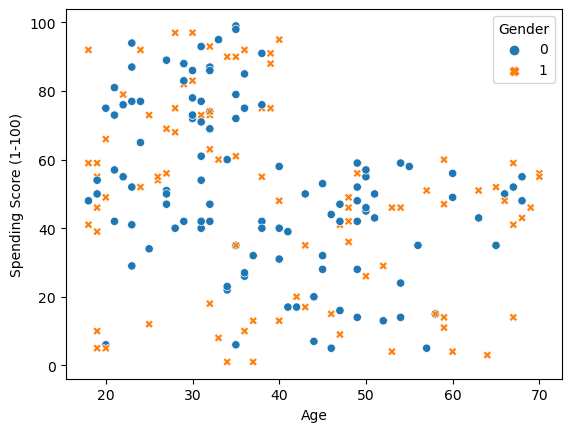

In [349]:
sns.scatterplot(data=df_mall, x='Age', y='Spending Score (1-100)', hue='Gender', style='Gender')
plt.show()

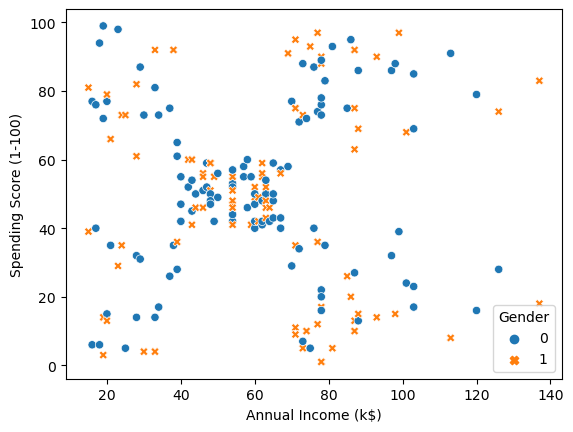

In [350]:
sns.scatterplot(data=df_mall, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', style='Gender')
plt.show()

In [352]:
df_mall_kmeans = df_mall.drop('CustomerID', axis=1)

In [353]:
elbow = []

for i in range(1,15):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df_mall_kmeans)
    elbow.append(kmeans.inertia_)

/home/eduardosatiro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/eduardosatiro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/eduardosatiro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/eduardosatiro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

In [354]:
df_mall_kmeans

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


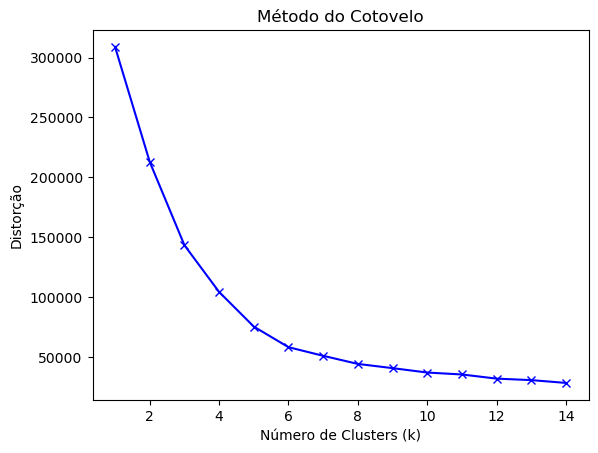

In [355]:
plt.plot(range(1,15), elbow, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorção')
plt.title('Método do Cotovelo')
plt.show()

In [321]:
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [356]:
model_kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state = 3, n_init=100, algorithm='auto')
model_kmeans.fit(df_mall_kmeans)
train_kmeans = model_kmeans.predict(df_mall_kmeans)

/home/eduardosatiro/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [357]:
df_mall_kmeans['Cluster'] = train_kmeans

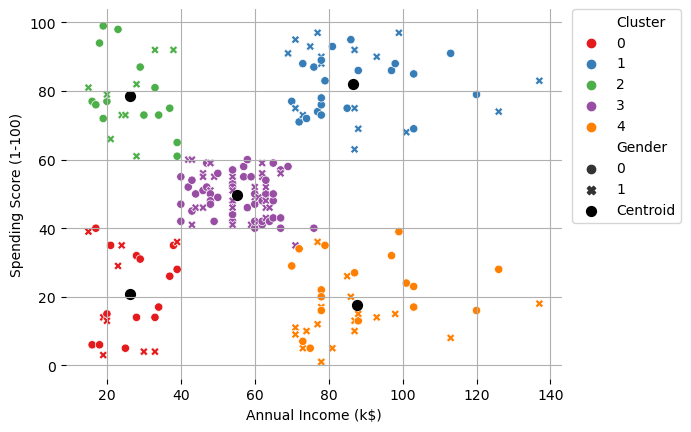

In [478]:
#Gender	Age	Annual Income (k$)	Spending Score (1-100)	Cluster
sns.scatterplot(data=df_mall_kmeans, x='Annual Income (k$)', y='Spending Score (1-100)', 
                style='Gender', hue='Cluster', palette="Set1")

# Plotting the centriod
plt.scatter(model_kmeans.cluster_centers_[:, 2], model_kmeans.cluster_centers_[:, 3], 
            s = 50, c = 'black', label = 'Centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(None)

plt.show()

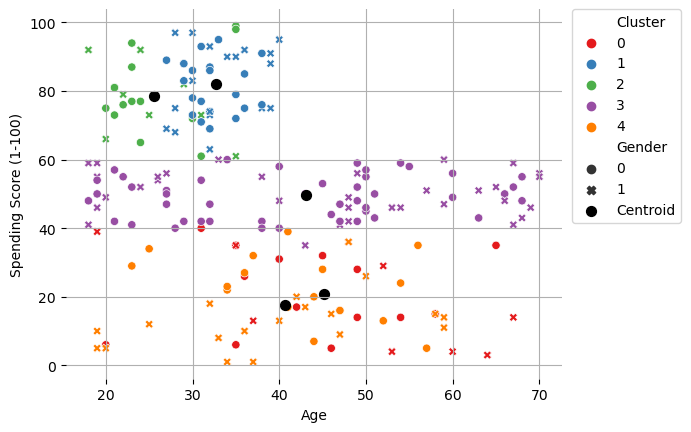

In [477]:
#Gender	Age	Annual Income (k$)	Spending Score (1-100)	Cluster
sns.scatterplot(data=df_mall_kmeans, x='Age', y='Spending Score (1-100)', hue='Cluster', 
                style='Gender', palette="Set1")

# Plotting the centriod
plt.scatter(model_kmeans.cluster_centers_[:, 1], model_kmeans.cluster_centers_[:, 3], 
            s = 50, c = 'black', label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0) 
plt.grid(True)
plt.box(None)

plt.show()

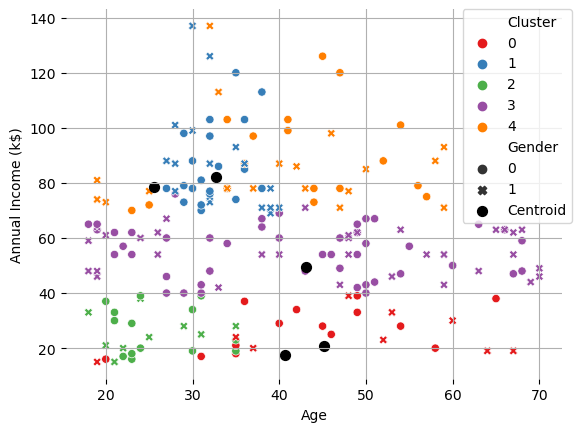

In [479]:
#Gender	Age	Annual Income (k$)	Spending Score (1-100)	Cluster
sns.scatterplot(data=df_mall_kmeans, x='Age', y='Annual Income (k$)', hue='Cluster', 
                style='Gender', palette="Set1")

# Plotting the centriod
plt.scatter(model_kmeans.cluster_centers_[:, 1], model_kmeans.cluster_centers_[:, 3], 
            s = 50, c = 'black', label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(None)

plt.show()

In [438]:
#
# GaussianMixture
#

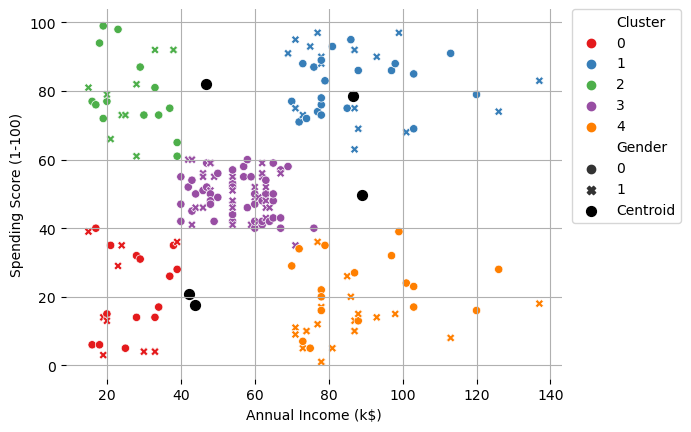

In [471]:
model_gmm = GaussianMixture(n_components=5, random_state=20, init_params='k-means++', n_init=100)
model_gmm.fit(df_mall_gmm)
train_gmm = model_gmm.predict(df_mall_gmm)
df_mall_gmm['Cluster'] = train_gmm

sns.scatterplot(data=df_mall_kmeans, x='Annual Income (k$)', 
                y='Spending Score (1-100)', hue='Cluster', 
                style='Gender', palette="Set1")

plt.scatter(model_gmm.means_[:, 2], model_kmeans.cluster_centers_[:, 3], 
            s = 50, c = 'black', label = 'Centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(None)

plt.show()

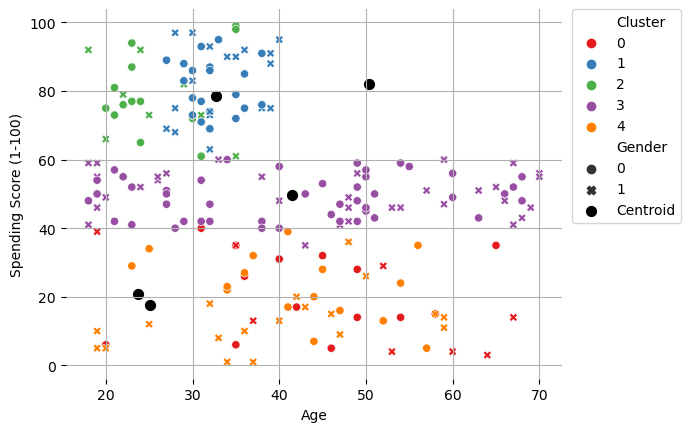

In [474]:
#Gender	Age	Annual Income (k$)	Spending Score (1-100)	Cluster
sns.scatterplot(data=df_mall_kmeans, x='Age', 
                y='Spending Score (1-100)', hue='Cluster', 
                style='Gender', palette="Set1")

plt.scatter(model_gmm.means_[:, 1], model_kmeans.cluster_centers_[:, 3], 
            s = 50, c = 'black', label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(None)

plt.show()

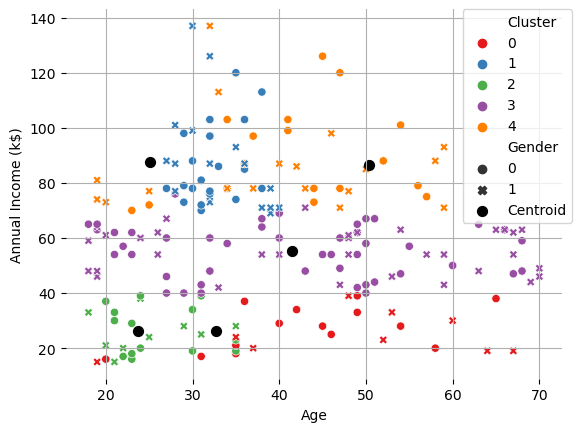

In [475]:
#Gender	Age	Annual Income (k$)	Spending Score (1-100)	Cluster
sns.scatterplot(data=df_mall_kmeans, x='Age', 
                y='Annual Income (k$)', hue='Cluster', 
                style='Gender', palette="Set1")

plt.scatter(model_gmm.means_[:, 1], model_kmeans.cluster_centers_[:, 2], 
            s = 50, c = 'black', label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(None)

plt.show()

In [385]:
#plt.scatter(df_mall_gmm.iloc[:, 1], df_mall_gmm.iloc[:, 2], c=df_mall_gmm['Cluster'], cmap='viridis')
#plt.colorbar()
#plt.show()